In [34]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
# 1. 데이터 불러오기 및 정규화 (0~1 범위로)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [37]:
# 2. 라벨을 One-hot 인코딩으로 변환
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [40]:
# 3. DNN 모델 생성
model = Sequential([
    Flatten(input_shape=(28, 28)),         # 28x28 이미지를 1차원 벡터(784차원)로 변환
    Dense(128, activation='relu'),         # 첫 번째 은닉층, 뉴런 128개
    Dense(64, activation='relu'),          # 두 번째 은닉층, 뉴런 64개
    Dense(10, activation='softmax')        # 출력층, 숫자 0~9 클래스 (10개)
])

In [42]:
# 4. 모델 컴파일 (손실 함수, 최적화 알고리즘 설정)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])       # 정확도도 함께 출력하도록 설정

In [44]:
# 5. 모델 학습 (EarlyStopping 콜백 포함)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train_cat,
                    epochs=20,                # 최대 20회 반복
                    batch_size=32,            # 한 번에 32개 데이터 사용
                    validation_split=0.1,     # 검증 데이터 10%
                    callbacks=[early_stop],   # 조기 종료 조건 설정
                    verbose=1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8728 - loss: 0.4410 - val_accuracy: 0.9623 - val_loss: 0.1237
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9671 - loss: 0.1120 - val_accuracy: 0.9767 - val_loss: 0.0851
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0728 - val_accuracy: 0.9757 - val_loss: 0.0895
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9763 - val_loss: 0.0795
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9874 - loss: 0.0409 - val_accuracy: 0.9745 - val_loss: 0.0944
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0310 - val_accuracy: 0.9778 - val_loss: 0.0848
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9907 - loss: 0.0277 - val_accuracy: 0.9765 - val_loss: 0.0978


In [46]:
# 6. 테스트 데이터로 평가
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n 테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.0882

 테스트 정확도: 0.9765


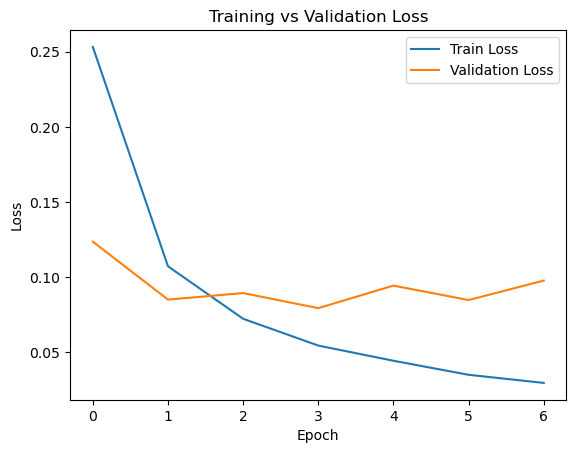

In [52]:
# 7. 학습 및 검증 손실 그래프 시각화
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


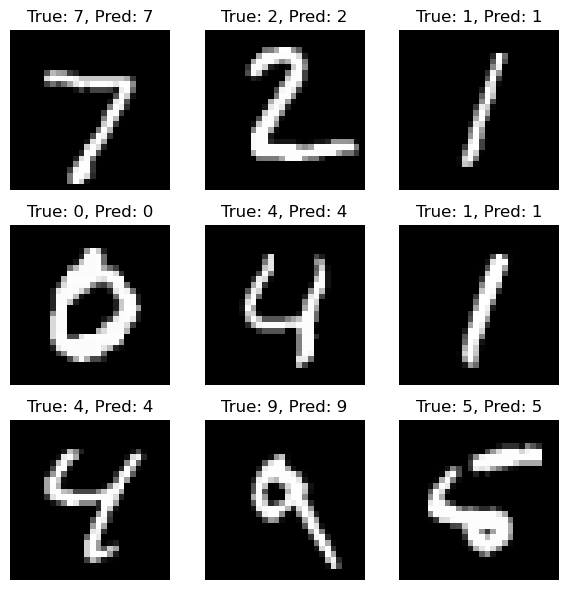

In [54]:
# 8. 테스트 이미지 9장을 예측하고 시각화
predictions = model.predict(x_test[:9])  # 앞 9장 예측

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    true_label = y_test[i]                        # 실제 정답
    pred_label = np.argmax(predictions[i])        # 예측한 숫자
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


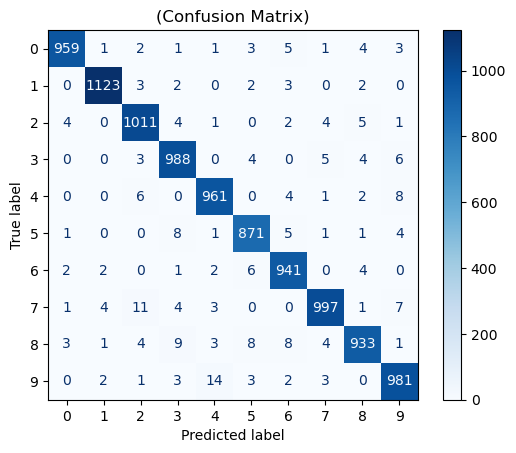

In [56]:
# 9. 혼동 행렬 시각화 (Confusion Matrix)
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("(Confusion Matrix)")
plt.show()